## Openebench_gmi


In [34]:
import json
import numpy as np
in_file = 'participant_matrix.json'
with open(in_file) as json_file:  
    data = json.load(json_file)

In [35]:
participants = data['participants']
p_matrix_values = np.array(data['matrix']['values'])
p_matrix_values

array([[0.8, 2.4, 2.5, 3.9, 0.4, 4.3, 0.2],
       [2.4, 0.5, 4.2, 1.3, 2.7, 0.1, 0.2],
       [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.3],
       [0.6, 0.1, 0.3, 0.2, 3.1, 0.4, 0.5],
       [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.3],
       [1.3, 1.2, 0.4, 0.4, 0.7, 3.2, 5.1],
       [0.1, 2.2, 0.8, 1.4, 0.9, 1.9, 6.3]])

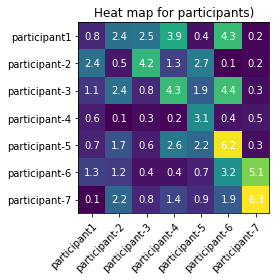

In [36]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(p_matrix_values)


# We want to show all ticks...
ax.set_xticks(np.arange(len(participants)))
ax.set_yticks(np.arange(len(participants)))
# ... and label them with the respective list entries
ax.set_xticklabels(participants)
ax.set_yticklabels(participants)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(p_matrix_values)):
    for j in range(len(p_matrix_values)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Heat map for participants)")
fig.tight_layout()
plt.show()